In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

import numpy as np
import time
from PIL import Image
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
resnet = models.squeezenet1_1(pretrained=True).cuda()

['AlexNet', 'DenseNet', 'Inception3', 'ResNet', 'SqueezeNet', 'VGG', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'inception', 'inception_v3', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn']


Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/richard/.torch/models/squeezenet1_1-f364aa15.pth
100.0%


In [6]:
# load ImageNet labels
labels_file = 'synset_words.txt'

labels = np.loadtxt(labels_file, str, delimiter='\t')

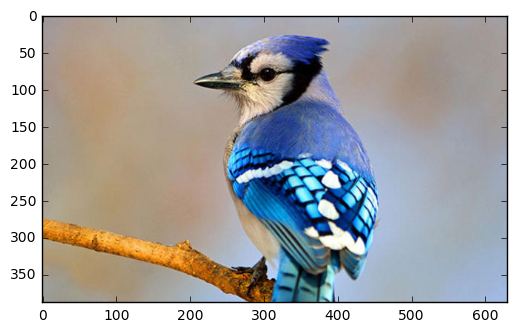

In [13]:
img_file = Image.open('bird.jpg')

plt.imshow(img_file)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
            transforms.Scale(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize
])

img = preprocess(img_file).unsqueeze(0).cuda()

In [14]:
start = time.time()

output = resnet(Variable(img))

end = time.time() - start

print("Image processed in {} seconds".format(end))

Image processed in 0.00977325439453125 seconds


In [20]:
prediction = np.argmax(output.data.cpu().numpy())
print(labels[prediction].split()[1][:-1])

jay
